<a href="https://colab.research.google.com/github/jazzminegarg/Quantum-Computing/blob/main/Assignments/Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SECTION - 1

In [1]:
!pip install qiskit==0.43.2

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.7 MB/s eta 0:00:00
  Created wheel for qiskit: filename=qiskit-0.43.2-py3-none-any.whl size=7755 sha256=0a08e6ea86599467691dc26142eec344b3f237b813cf106e2df2dbfb5c2ceaf8
  Sto

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

In [2]:
# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2, 2)

# Create an entangled Bell pair
qc.h(0)
qc.cx(0, 1)

# Encode the message (e.g., 10)
message = '10'
if message[0] == '1':
    qc.z(0)
if message[1] == '1':
    qc.x(0)

# Decode the message
qc.cx(0, 1)
qc.h(0)

# Measure the qubits
qc.measure([0, 1], [0, 1])

# Display the circuit
qc.draw()

┌───┐     ┌───┐     ┌───┐┌─┐
q_0: ┤ H ├──■──┤ Z ├──■──┤ H ├┤M├
     └───┘┌─┴─┐└───┘┌─┴─┐└┬─┬┘└╥┘
q_1: ─────┤ X ├─────┤ X ├─┤M├──╫─
          └───┘     └───┘ └╥┘  ║ 
c: 2/══════════════════════╩═══╩═
                           1   0

{'01': 1024}


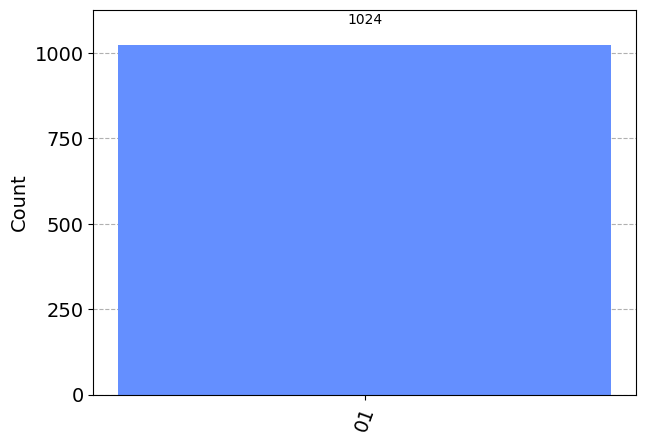

In [3]:
# Use the Aer simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit
job = execute(qc, simulator, shots=1024)
result = job.result()

# Get the counts
counts = result.get_counts(qc)

# Display the results
print(counts)
plot_histogram(counts)

SECTION - 2

In [4]:
# Create a quantum circuit with 3 qubits
qc = QuantumCircuit(3, 3)

# Create the state to be teleported (e.g., |+>)
qc.h(0)

# Create an entangled Bell pair between qubits 1 and 2
qc.h(1)
qc.cx(1, 2)

# Bell measurement on qubits 0 and 1
qc.cx(0, 1)
qc.h(0)

# Apply controlled gates on qubit 2 based on measurement outcomes
qc.cx(1, 2)
qc.cz(0, 2)

# Measure qubits 0 and 1
qc.measure([0, 1], [0, 1])

# Display the circuit
qc.draw()

┌───┐          ┌───┐      ┌─┐
q_0: ┤ H ├───────■──┤ H ├─■────┤M├
     ├───┤     ┌─┴─┐└───┘ │ ┌─┐└╥┘
q_1: ┤ H ├──■──┤ X ├──■───┼─┤M├─╫─
     └───┘┌─┴─┐└───┘┌─┴─┐ │ └╥┘ ║ 
q_2: ─────┤ X ├─────┤ X ├─■──╫──╫─
          └───┘     └───┘    ║  ║ 
c: 3/════════════════════════╩══╩═
                             1  0

{'011': 253, '010': 267, '000': 242, '001': 262}


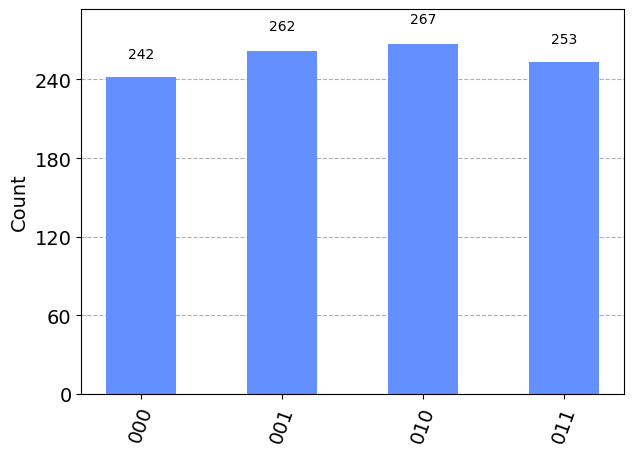

In [5]:
# Use the Aer simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit
job = execute(qc, simulator, shots=1024)
result = job.result()

# Get the counts
counts = result.get_counts(qc)

# Display the results
print(counts)
plot_histogram(counts)

SECTION - 3

In [6]:
# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2)

# Apply Hadamard to the target qubit (to put it in superposition)
qc.h(1)

# Apply controlled-phase gate (CZ) with target as control and control as target
qc.cz(1, 0)  # This acts like a reverse CNOT

# Apply Hadamard to the target qubit again
qc.h(1)

# Display the circuit
qc.draw()

q_0: ──────■──────
     ┌───┐ │ ┌───┐
q_1: ┤ H ├─■─┤ H ├
     └───┘   └───┘

In [9]:
import numpy as np
# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2)

# Apply Hadamard to the control qubit
qc.h(0)

# Apply T-gate to the target qubit
qc.t(1)

# Apply controlled-T gate (with target as control)
qc.cp(np.pi/4, 1, 0)  # Controlled-T gate using cp

# Apply Hadamard to the control qubit
qc.h(0)

# Display the circuit
qc.draw()

┌───┐         ┌───┐
q_0: ┤ H ├─■───────┤ H ├
     ├───┤ │P(π/4) └───┘
q_1: ┤ T ├─■────────────
     └───┘